# Importamos librerías a utilizar

In [1]:
#Para crear y análizar redes
import networkx as nx
#Para dibujar redes y graficar funciones
import matplotlib.pyplot as plt
#Para leer desde un archivo
import pandas as pd 
import numpy as np
#Para generar errores aleatorios
import random
from random import randint, uniform,random

# Funciones para imprimir la informacion de la red
## ACTIVIDAD 1: Información general de la red
Coloque la función imprime_informacion. Esta función imprime la información de la red. Recibe la red G e imprime el numero de nodos, numero de enlaces, diámetro, y densidad de la red G.

In [2]:
def imprime_informacion(G):
    print("Información de la red:")
    print(f"- num nodos = {len(nx.nodes(G))}")
    print(f"- num enlaces = {len(nx.edges(G))}")
    print(f"- diametro = {nx.diameter(G)}")
    print(f"- densidad = {nx.density(G)}")
    print(nx.info(G))

## ACTVIDAD 2: Distribución de grados
Coloque la función grafica_distribucion_grados. Esta funcion grafica la distribucion de grados. Recibe la red G y la variable nombre_dg. Cálcula, imprime y gráfica la distribución de grados. La gráfica la guarda en un archivo png con nombre almacenado en la variable nombre_dg. Devuleve la distribución de grados

In [3]:
def grafica_distribucion_grados(G, nombre_dg):
    dist_grados = nx.degree_histogram(G)
    plt.plot(dist_grados)
    plt.xlabel("grado")
    plt.ylabel("#nodos")
    plt.title("Distribución de Grados")
    plt.savefig(nombre_dg)
    plt.show()
    #return dist_grados

# ACTIVIDAD 3: Mapa de calor por grado nodal
Coloque la función mapa_calor_grado. Esta función gráfica el mapa de calor de la red G. Recibe como parámetros a la red G y la variable nombre_red. Grafica el mapa de calor y lo guarda en un archivo png con el nombre alamcenado en nombre_red.

In [4]:
def mapa_calor_grado(G, nombre_red):
    degree_map = {node:nx.degree(G, node) for node in G.nodes()}
    #valores máximo y mínimos de grado
    max_degree = max(degree_map.values())
    min_degree = min(degree_map.values())
    #el grado nodal nos da el color de nodo, el cual se mapea con el mapa de color
    colores_nodos = list(degree_map.values())
    #ver mapas de color en https://matplotlib.org/stable/tutorials/colors/colormaps.html
    mapa_color = plt.get_cmap('bwr')
    #dibujamos la red
    nx.draw(G, cmap=mapa_color, node_color=colores_nodos, with_labels=True)
    #dibujamos la barra de color
    sm = plt.cm.ScalarMappable(cmap=mapa_color,norm=plt.Normalize(vmin = min_degree, vmax=max_degree))
    cbar = plt.colorbar(sm)
    cbar.set_label('Grado')
    plt.savefig(nombre_red + ".png")
    plt.show()
    # la siguiente instruccion limpia la figura, evitando que al graficar varias figuras, estas no se encimen 
    plt.clf()

# Funciones para análizar la red sometida a fallos o ataques

## ACTIVIDAD 4: Número de componentes conectado

Cree una función llamada num_componentes_conectados que recibe como parámetro la red G y devuelve el número de componentes conectados de G.Utilizar los métodos ya diseñados en python para el calculo de componentes conectados de una red, ver https://networkx.org/documentation/stable/reference/algorithms/component.html. 

In [5]:
def num_componentes_conectados(G):
    num_cc = nx.number_connected_components(G)
    return num_cc

## ACTIVIDAD 5: Proporción del componente gigante

Cree una función llamada prop_componente_gigante que recibe como parámetro la red G y devuelve al proporción de nodos que tiene el componente gigante con respecto a los nodos que tiene G. Utilizar los métodos ya diseñados en python para el calculo de componentes conectados de una red, ver https://networkx.org/documentation/stable/reference/algorithms/component.html. Recuerde que la función len(A) le permite calcular el número de elementos en un conjunto o lista A.

In [6]:
def prop_componente_gigante(G):
    pcg = len(max(nx.connected_components(G), key=len))/len(nx.nodes(G))
    return pcg

## ACTIVIDAD 6: Graficar dos funciones en una misma figura
Funcion que grafica dos funciones en una misma figura. Comente lo que ocurre en cada línea de código de la función

Parámetros:

1) titulo : texto

2) f1_valores: lista de numeros

3) f2_valores: lista de numeros

4) f1_leyenda: texto

5) f2_leyenda: texto

6) ejex_etiqueta: texto

7) ejey_etiqueta: texto

In [7]:
def grafica_funciones(titulo,f1_valores, f2_valores,f1_leyenda, f2_leyenda ,ejex_etiqueta, ejey_etiqueta,nombre):
    plt.title(titulo)
    plt.plot(f1_valores, label=f1_leyenda)  
    plt.plot(f2_valores, label=f2_leyenda)
    plt.xlabel(ejex_etiqueta)
    plt.ylabel(ejey_etiqueta)
    plt.legend()
    plt.savefig(nombre)

# Funciones para simular de Errores

## ACTIVIDAD 7: Función para simular un error
Cree la función error(G) que simule un error en la red G.

1) error(G) - Recibe una red G, elimina un nodo i aleatoreamente y devuelve la nueva red G (sin el nodo i)

In [8]:
def error(G):
    list_nodos = []
    #se obtienen una lista de los nodos de la red G
    lista_n = nx.nodes(G)
    #Se almacena una copia en otra lista para manipularlos
    for i in lista_n:
        list_nodos.append(i)
    #Se obtiene el número de nodos que tiene la red  
    num_nodos = len(list_nodos)
    #Se elige un número al azar entre 0 y el núm maximo de nodos
    x = randint(0,(num_nodos-1))
    #Se elimina el nodo que se escogio al azar
    G.remove_node(list_nodos[x])
    return G

## ACTIVIDAD 8: Función para simular varios errores secuenciales
Cree la función errores_secuenciales(G,num_errores)

2) errores_secuenciales(G,num_errores) - Recibe una red G y un entero "num_errores" que indica la cantidad de errores que ocurrirán en la red. Secuencialmente llama "num_errores" veces a la función error(G). Después de cada error almacena en una lista el número de componentes conectados de G y en otra lista la proporción del componente gigante. Devuleve la tupla (num_cc_lista, prop_cg_lista), en donde num_cc_lista es una lista de enteros cuyos elementos indican el numero de componentes conectados después de cada error. Mientras que prop_cg_lista es una lista de flotantes cuyos elementos indican la proporción del compoente gigante después de cada error.

In [9]:
def errores_secuenciales(G,num_errores):
    num_cc_lista = []
    prop_cg_lista = []
    for i in range(0,num_errores):
        #Se manda a llamar a la función error para que elimine los nodo y devuelva la red con los
        #nodos eliminados
        G = error(G)
        #Se van almacenando el num de componentes conectados y la proporción del componente gigante de la red
        num_cc_lista.append(num_componentes_conectados(G))
        prop_cg_lista.append(prop_componente_gigante(G))
    return (num_cc_lista, prop_cg_lista)

# Funciones para simular de Ataques

## ACTIVIDAD 9: Función para simular un ataque por grado nodal
Cree la función ataque_grado(G) que simule un ataque por grado nodal en la red G.

1) ataque_grado(G) - Recibe una red G, elimina el nodo i de más alto grado grado y devuelve la nueva red G (sin el nodo i). Opcionalmente puede crear una función nodo_max_grado(G) que devuelva el nodo de grado mas alto en G. Después puede llamar esta función desde la función ataque_grado(G)

In [10]:
def nodo_max_grado(G):
    list_n = []
    #se obtienen una lista de los nodos de la red G
    lista_nodos = nx.nodes(G)
    #Se almacena una copia en otra lista para manipularlos
    list_n = list(lista_nodos)
    #Se toma el primer elemento de la mista como el nodo maximo, solo como referencia
    big = list_n[0]
    n = nx.degree(G,list_n[0])
    #Se recorren todos los nodos en busqueda del nodo con mayor grado nodal
    for i in lista_nodos:
        #Codición para analizar si el grado nodal actual es mayor al almacenado anteriormente en 'n'
        if (nx.degree(G,i)) > n:
            #Cuando se encuentra ese nodo se almacena el nombre y el grado nodal
            n = nx.degree(G,i)
            big = i
    return big

In [11]:
def ataque_grado(G):
    #Se manda a llamar a la función con grado nodal mayor
    n = nodo_max_grado(G)
    #Cuando se obtiene ese nodo se elimina
    G.remove_node(n)
    return G

## ACTIVIDAD 10: Función para simular varios ataques (por grado nodal) secuenciales
Cree la función ataques_secuenciales(G,num_ataques)

2) ataques_secuenciales(G,num_ataques) - Recibe una red G y un entero "num_ataques" que indica la cantidad de ataques que ocurrirán en la red. Secuencialmente llama "num_ataques" veces a la función ataque(G). Después de cada ataque almacena en una lista el número de componentes conectados de G y en otra lista la proporción del componente gigante. Devuleve la tupla (num_cc_lista, prop_cg_lista), en donde num_cc_lista es una lista de enteros cuyos elementos indican el numero de componentes conectados después de cada error. Mientras que prop_cg_lista es una lista de flotantes cuyos elementos indican la proporción del compoente gigante después de cada error.

In [12]:
def ataques_secuenciales(G,num_ataques):
    num_cc_lista = []
    prop_cg_lista = []
    #Ciclo para ir eliminando los nodos con mayor grado nodal
    for i in range(num_ataques):
        G = ataque_grado(G)
        #Se van almacenando el num de componentes conectados y la proporción del componente gigante de la red
        num_cc_lista.append(num_componentes_conectados(G))
        prop_cg_lista.append(prop_componente_gigante(G))
    return (num_cc_lista, prop_cg_lista)

# Evaluación de redes sometidas a errores - Red de escala libre vs. red de aleatoria

## ACTIVIDAD 11: Creación de la redes de escala libre y aleatoria
Creamos una red aleatoria Erdos-Renyi (con parámetro p=0.1) y una red de escala libre Barabasi-Albert (con parámetro m=5), imprimos la información de ambas redes y las dibujamos y guardamos ambas imagenes

In [13]:
#Funcion para graficar la red y lamacenarla 
def grafica_red(G, nombre_red,color):
    nx.draw(G, with_labels = True, node_color = color)
    plt.savefig(nombre_red)

Información de la red:
- num nodos = 100
- num enlaces = 475
- diametro = 4
- densidad = 0.09595959595959595
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 475
Average degree:   9.5000


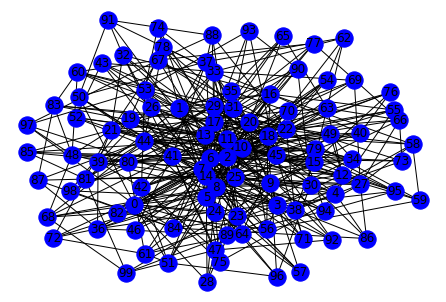

In [14]:
# Barabasi-Albert
G1 = nx.barabasi_albert_graph(100,5,seed = None)
imprime_informacion(G1)
grafica_red(G1,"Red_Barabasi-Albert","blue")

Información de la red:
- num nodos = 100
- num enlaces = 473
- diametro = 4
- densidad = 0.09555555555555556
Name: 
Type: Graph
Number of nodes: 100
Number of edges: 473
Average degree:   9.4600


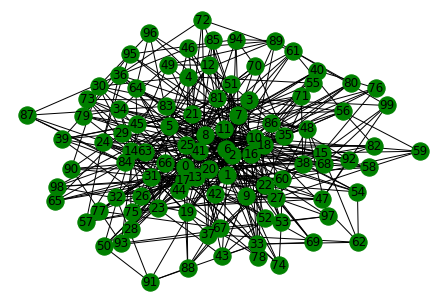

In [15]:
# Erdos-Renyi
G2 = nx.erdos_renyi_graph(100,0.1,seed = None,directed = False)
imprime_informacion(G2)
grafica_red(G1,"Red_Erdos-Renyi","green")

## ACTIVIDAD 12: Distribución de grados
Llama a la función para graficar las distribucion de grados de las redes creadas y guarda ambas imagenes. Cada función llamela en una celda separada de código para que así pueda visualizar ambas figuras

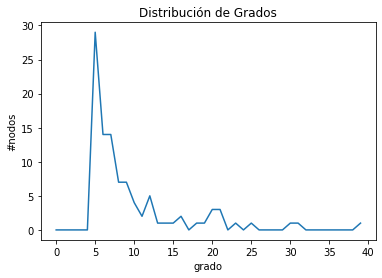

In [16]:
# Distribucion de grados BA
grafica_distribucion_grados(G1,"distribucion_grado_BA")

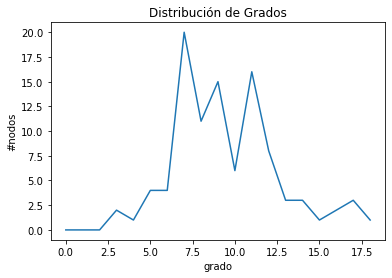

In [17]:
# Distribucion de grados ER
grafica_distribucion_grados(G2,"distribucion_grado_ER")

## ACTIVIDAD 13: Mapas de calor por grado nodal
Llama a la función para graficar los mapas de calor por grado nodal de las redes creadas y guarda ambas imagenes. Cada función llamela en una celda separada de código para que así pueda visualizar ambas figuras

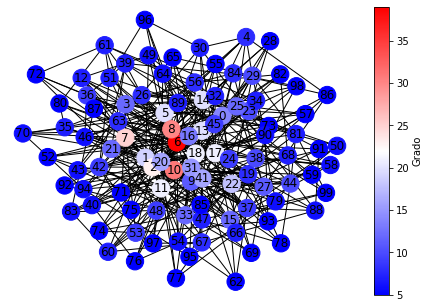

<Figure size 432x288 with 0 Axes>

In [18]:
# Mapa de calor BA
mapa_calor_grado(G1,"mapa_calor_BA")

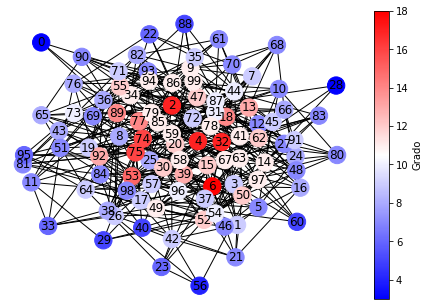

<Figure size 432x288 with 0 Axes>

In [19]:
# Mapa de calor ER
mapa_calor_grado(G2,"mapa_calor_ER")

## ACTIVIDAD 14: Simulación de errores secuenciales
Utilizando la función errores_secuenciales simula 99 errores en cada una de las redes creadas. En ambos casos, almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante.

Es importante que la función errores_secuenciales reciba como paŕametro una copia de la red que se va a evaluar, de otro modo se modificará la red original.

In [20]:
cc_BA_error, pcg_BA_error = errores_secuenciales(G1.copy(),99)
cc_ER_error, pcg_ER_error = errores_secuenciales(G2.copy(),99)

## ACTIVIDAD 15: Grafica de los componentes conectados vs. número de errores
Utilizando la función grafica_funciones, grafique la cantidad de componentes conectados vs el número de errroes

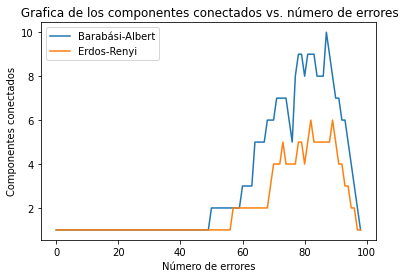

In [21]:
grafica_funciones(" Grafica de los componentes conectados vs. número de errores",
                  cc_BA_error, cc_ER_error,"Barabási-Albert","Erdos-Renyi","Número de errores",
                  "Componentes conectados","cc_vs_num_errores_error")

## ACTIVIDAD 16: Grafica de la proporción del componente gigante vs. número de errores
Utilizando la función grafica_funciones, grafique la proporción del componente gigante vs el número de errroes

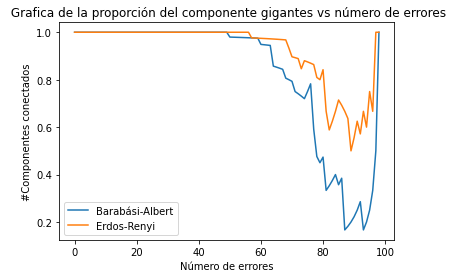

In [22]:
grafica_funciones(" Grafica de la proporción del componente gigantes vs número de errores",
                  pcg_BA_error, pcg_ER_error,"Barabási-Albert","Erdos-Renyi","Número de errores",
                  "#Componentes conectados","pcg_vs_num_errores_error")

## ACTVIDAD 17 Simulación de ataques (por grado nodal) secuenciales
Utilizando la función ataques_secuenciales simula 99 ataques en cada una de las redes creadas. En ambos casos, almacena las listas de: cantidad de componentes conectados y las proporcion del componente gigante.

Es importante que la función errores_secuenciales reciba como paŕametro una copia de la red que se va a evaluar, de otro modo se modificará la red original.

In [23]:
cc_BA_dgree, pcg_BA_dgree = ataques_secuenciales(G1.copy(),99)
cc_ER_dgree, pcg_ER_dgree = ataques_secuenciales(G2.copy(),99)

## ACTVIDAD 18 Grafica de los componentes conectados vs. número de errores
Utilizando la función grafica_funciones, grafique la cantidad de componentes conectados vs el número de errroes

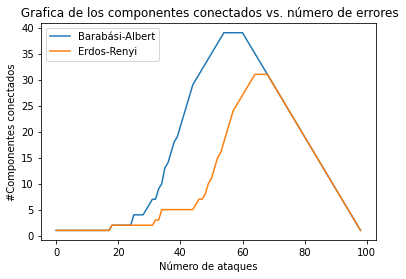

In [24]:
grafica_funciones(" Grafica de los componentes conectados vs. número de errores",
                  cc_BA_dgree, cc_ER_dgree,"Barabási-Albert","Erdos-Renyi","Número de ataques",
                  "#Componentes conectados","cc_vs_num_errores_ataques")

## ACTVIDAD 19: Grafica de la proporción del componente gigante vs. número de errores
Utilizando la función grafica_funciones, grafique la proporción del componente gigante vs el número de errroes

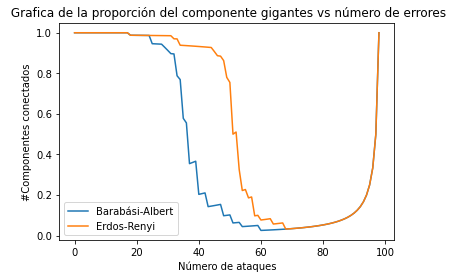

In [25]:
grafica_funciones(" Grafica de la proporción del componente gigantes vs número de errores",
                  pcg_BA_dgree, pcg_ER_dgree,"Barabási-Albert","Erdos-Renyi","Número de ataques",
                  "#Componentes conectados","pcg_vs_num_errores_ataques")